In [0]:
!pip install tensorflow==2.0.0 -q

     |████████████████████████████████| 86.3MB 66kB/s 
     |████████████████████████████████| 3.8MB 38.5MB/s 
     |████████████████████████████████| 450kB 61.5MB/s 


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.optimizers import SGD

from sklearn.utils import shuffle

In [0]:
!wget http://files.grouplens.org/datasets/movielens/ml-20m.zip

--2020-03-28 14:54:10--  http://files.grouplens.org/datasets/movielens/ml-20m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: ‘ml-20m.zip.2’

ml-20m.zip.2        100%[===================>] 189.50M  67.1MB/s    in 2.8s    

2020-03-28 14:54:13 (67.1 MB/s) - ‘ml-20m.zip.2’ saved [198702078/198702078]



In [0]:
!unzip ml-20m.zipMB

unzip:  cannot find or open ml-20m.zipMB, ml-20m.zipMB.zip or ml-20m.zipMB.ZIP.


In [0]:
df = pd.read_csv('ml-20m/ratings.csv')

In [0]:
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [0]:
type(df['userId'])

pandas.core.series.Series

In [0]:
#converting userId and movieId tom categorical data type
df.userId = pd.Categorical(df.userId)
df['new_userId'] = df.userId.cat.codes

In [0]:
df.movieId = pd.Categorical(df.movieId)
df['new_movieId'] = df.movieId.cat.codes

In [0]:
df['new_movieId'].nunique()

26744

In [0]:
user_Id = df['new_userId'].values
movie_Id = df['new_movieId'].values
rating = df['rating'].values

In [0]:
#len of new_movieId and userId
N = len(set(user_Id))

M = len(set(movie_Id))

#Embedding dimenssion

K = 10

In [0]:
M

26744

In [0]:
#Creating a Linerar Regressor
u = Input(shape=(1,))
m = Input(shape=(1,))

#embedding matrix
u_emb = Embedding(N,K)(u)
m_emb = Embedding(M,K)(m)

#Flatten the matrix
u_emb = Flatten()(u_emb)
m_emb = Flatten()(m_emb)

#concatenate the matrix

x = Concatenate()([u_emb,m_emb])
x = Dense(1024, activation='relu')(x)
x = Dense(1)(x)

In [0]:
model = Model(inputs=[u,m],outputs=x)

In [0]:
model.compile(
    loss = 'mse',
    optimizer = SGD(learning_rate=0.08, momentum=0.9)
)

In [0]:
#creating train and test
user_Id, movie_Id, rating = shuffle(user_Id,movie_Id,rating)
Ntrain = int(0.8*len(rating))

train_user = user_Id[:Ntrain]
train_movie = movie_Id[:Ntrain]
train_rating = rating[:Ntrain]

test_user = user_Id[Ntrain:]
test_movie = movie_Id[Ntrain:]
test_rating = rating[Ntrain:]

#Centre the ratings 
avg_rating = train_rating.mean()
train_rating = train_rating - avg_rating
test_rating = test_rating - avg_rating

In [0]:
r = model.fit(
  x=[train_user, train_movie],
  y=train_rating,
  epochs=25,
  batch_size=1024,
  verbose=2, # goes a little faster when you don't print the progress bar
  validation_data=([test_user, test_movie], test_rating),
)

Train on 16000210 samples, validate on 4000053 samples
Epoch 1/25
16000210/16000210 - 194s - loss: 0.7787 - val_loss: 0.7216
Epoch 2/25
16000210/16000210 - 199s - loss: 0.7021 - val_loss: 0.6972
Epoch 3/25
16000210/16000210 - 212s - loss: 0.6782 - val_loss: 0.6831
Epoch 4/25
16000210/16000210 - 206s - loss: 0.6626 - val_loss: 0.6745
Epoch 5/25
16000210/16000210 - 206s - loss: 0.6517 - val_loss: 0.6684
Epoch 6/25
16000210/16000210 - 204s - loss: 0.6388 - val_loss: 0.6566
Epoch 7/25
16000210/16000210 - 203s - loss: 0.6224 - val_loss: 0.6476
Epoch 8/25
16000210/16000210 - 204s - loss: 0.6088 - val_loss: 0.6466
Epoch 9/25
16000210/16000210 - 203s - loss: 0.5987 - val_loss: 0.6382
Epoch 10/25
16000210/16000210 - 206s - loss: 0.5899 - val_loss: 0.6356
Epoch 11/25
16000210/16000210 - 203s - loss: 0.5814 - val_loss: 0.6364
Epoch 12/25
16000210/16000210 - 228s - loss: 0.5728 - val_loss: 0.6332
Epoch 13/25
16000210/16000210 - 215s - loss: 0.5649 - val_loss: 0.6258
Epoch 14/25
16000210/16000210 -

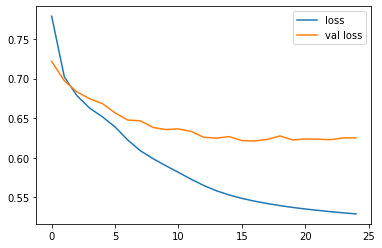

In [0]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()

In [0]:
np.square(0.6250)

0.390625